In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ESN_py.ESN import ESN
from ESN_py.config import parse_args
1

1

## Load Hyper parameters

In [2]:
args = parse_args()
args

extracting arguments


Namespace(Loss_function='mse', Test=True, damping=0.3, epoch=100, input_dim=1, input_scaling=1.25, inter_unit='tanh', l2_lambda=0.0, l_a='gd', lambda_=1.0, learning_rate=0.1, n_gamma=0.0002, output_dim=1, resSize=3000, sparsity=0.01, spectral_radius=0.1, task='cls', weight_scaling=1.25)

In [3]:
args.learning_rate = 1e-1
args.spectral_radius = 0.0
args.resSize = 1500
args.weight_scaling = 1.12
args.input_scaling = 1.0
args.sparsity = 1e-4

## Load Dataset

In [4]:
df = np.loadtxt("MackeyGlass_t17.txt")

In [12]:
# Split train test dataset
train_X = df[:1000]
train_y = df[:1000]
test_X = df[1000:2000]
test_y = df[1000:2000]

## Learning Rule : Gradient Descent

In [17]:
model = ESN(args)

In [18]:
model.fit(train_X,train_y,test_X,test_y)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch :0/100  Loss : 0.05113  time_required : 1.614
Test Metric MSE: 0.03918   RMSE: 0.19794   MAE: 0.17421   r2score: 0.15654
epoch :1/100  Loss : 0.03961  time_required : 1.391
Test Metric MSE: 0.03385   RMSE: 0.18400   MAE: 0.16215   r2score: 0.27121
epoch :2/100  Loss : 0.03428  time_required : 1.315
Test Metric MSE: 0.02458   RMSE: 0.15679   MAE: 0.13821   r2score: 0.47076
epoch :3/100  Loss : 0.02487  time_required : 1.226
Test Metric MSE: 0.01722   RMSE: 0.13122   MAE: 0.11347   r2score: 0.62933
epoch :4/100  Loss : 0.01736  time_required : 1.866
Test Metric MSE: 0.01330   RMSE: 0.11534   MAE: 0.09532   r2score: 0.71359
epoch :5/100  Loss : 0.01335  time_required : 29009.850
Test Metric MSE: 0.01012   RMSE: 0.10058   MAE: 0.08019   r2score: 0.78221
epoch :6/100  Loss : 0.01012  time_required : 1.710
Test Metric MSE: 0.00618   RMSE: 0.07864   MAE: 0.06271   r2score: 0.86687
epoch :7/100  Loss : 0.00619  time_required : 1.435
Test Metric MSE: 0.00283   RMSE: 0.05315   MAE: 0.04441

## Visualize Metrics

Test Metric MSE: 0.00000   RMSE: 0.00068   MAE: 0.00053   r2score: 0.99999


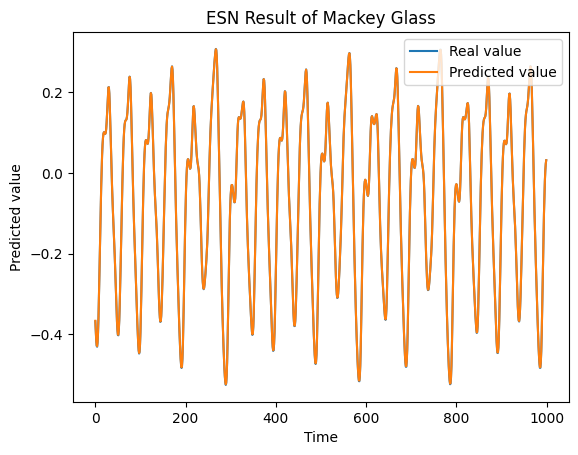

In [19]:
from ESN_py.utils.func import metric_func

plt.plot(df[2000:3000], label="Real value")  # Plot the real values
plt.plot(model.predict(df[2000:3000]).detach().cpu().numpy(), label="Predicted value")  # Plot the predicted values

# Print metrics
metric_func(df[2000:3000], model.predict(df[2000:3000]).detach().cpu().numpy())

# Plot Mackey glass
plt.title("ESN Result of Mackey Glass")
plt.xlabel("Time")
plt.ylabel("Predicted value")
plt.legend(loc='upper right')
plt.show()


## Learning Rule : Gradient Descent(batch)

In [6]:
train_X = train_X.reshape(-1,50,1)
train_y = train_y.reshape(-1,50,1)
test_X = test_X.reshape(-1,50,1)
test_y = test_y.reshape(-1,50,1)

In [7]:
import torch
train_X = torch.tensor(train_X, dtype = torch.float32)
train_y = torch.tensor(train_y, dtype = torch.float32)
test_X = torch.tensor(test_X, dtype = torch.float32)
test_y = torch.tensor(test_y, dtype = torch.float32)

In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(train_X, train_y)
test_dataset = TensorDataset(test_X, test_y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 20, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = 20, shuffle=False)


In [9]:
args.Test = True
args.l_a = "gd"

In [10]:
model = ESN(args)

In [11]:
model.fit(dataloader=dataloader, test_dataloader=test_dataloader ,test_y=test_y.view(-1,1))

  0%|          | 0/100 [00:00<?, ?it/s]

epoch :0/100  Loss : 0.05113  time_required : 0.281
Test Metric MSE: 0.03918   RMSE: 0.19794   MAE: 0.17421   r2score: 0.15654
epoch :1/100  Loss : 0.03961  time_required : 0.079
Test Metric MSE: 0.03385   RMSE: 0.18400   MAE: 0.16215   r2score: 0.27121
epoch :2/100  Loss : 0.03428  time_required : 0.069
Test Metric MSE: 0.02458   RMSE: 0.15679   MAE: 0.13821   r2score: 0.47076
epoch :3/100  Loss : 0.02487  time_required : 0.069
Test Metric MSE: 0.01722   RMSE: 0.13122   MAE: 0.11347   r2score: 0.62933
epoch :4/100  Loss : 0.01736  time_required : 0.116
Test Metric MSE: 0.01330   RMSE: 0.11534   MAE: 0.09532   r2score: 0.71359
epoch :5/100  Loss : 0.01335  time_required : 0.081
Test Metric MSE: 0.01012   RMSE: 0.10058   MAE: 0.08019   r2score: 0.78221
epoch :6/100  Loss : 0.01012  time_required : 0.072
Test Metric MSE: 0.00618   RMSE: 0.07864   MAE: 0.06271   r2score: 0.86687
epoch :7/100  Loss : 0.00619  time_required : 0.067
Test Metric MSE: 0.00283   RMSE: 0.05315   MAE: 0.04441   r

## Learning Rule : Inverse Matrix

In [6]:
args.l_a = "inverse"

In [7]:
model = ESN(args)

In [8]:
model.fit(train_X,train_y,test_X,test_y)

torch.Size([1000, 1])


  0%|          | 0/1000 [00:00<?, ?it/s]

Test Metric MSE: 0.00000   RMSE: 0.00000   MAE: 0.00000   r2score: 1.00000


## Visualize Metrics

Test Metric MSE: 0.00000   RMSE: 0.00000   MAE: 0.00000   r2score: 1.00000


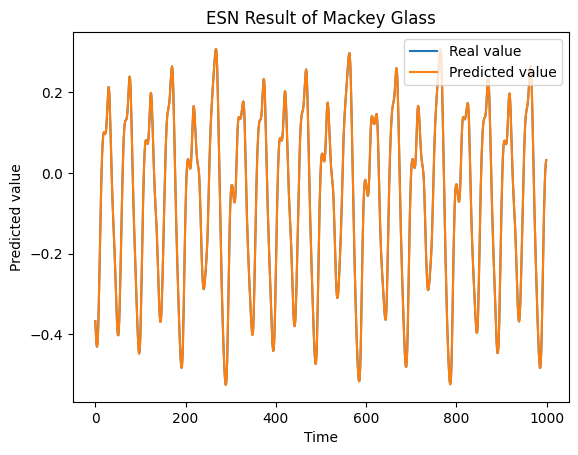

In [ ]:
from ESN_py.utils.func import metric_func

plt.plot(df[2000:3000], label="Real value")  # Plot the real values
plt.plot(model.predict(df[2000:3000]).detach().cpu().numpy(), label="Predicted value")  # Plot the predicted values

# Print metrics
metric_func(df[2000:3000], model.predict(df[2000:3000]).detach().cpu().numpy())

# Plot Mackey glass
plt.title("ESN Result of Mackey Glass")
plt.xlabel("Time")
plt.ylabel("Predicted value")
plt.legend(loc='upper right')
plt.show()


## Learning Rule : Online Learning

In [13]:
args.l_a ="online"
args.lambda_ = 0.1
args.n_gamma = 0.0

In [14]:
model = ESN(args)

In [15]:
model.fit(train_X,train_y,test_X,test_y)

  0%|          | 0/1000 [00:00<?, ?it/s]

Test Metric MSE: 0.00000   RMSE: 0.00005   MAE: 0.00004   r2score: 1.00000


Test Metric MSE: 0.00000   RMSE: 0.00005   MAE: 0.00004   r2score: 1.00000


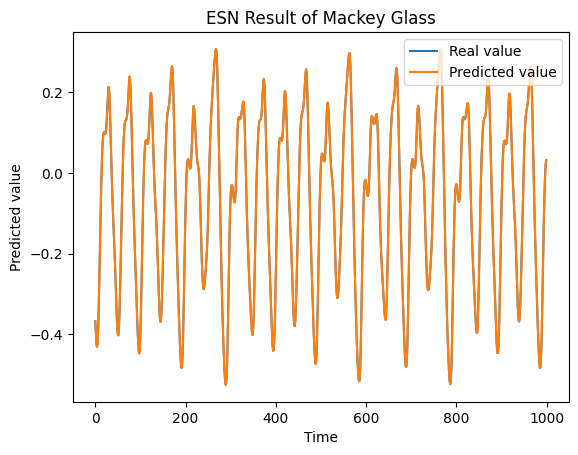

In [16]:
from ESN_py.utils.func import metric_func

plt.plot(df[2000:3000], label="Real value")  # Plot the real values
plt.plot(model.predict(df[2000:3000]).detach().cpu().numpy(), label="Predicted value")  # Plot the predicted values

# Print metrics
metric_func(df[2000:3000], model.predict(df[2000:3000]).detach().cpu().numpy())

# Plot Mackey glass
plt.title("ESN Result of Mackey Glass")
plt.xlabel("Time")
plt.ylabel("Predicted value")
plt.legend(loc='upper right')
plt.show()


## Generate Mode

In [ ]:
# Split train test dataset
train_X = df[:1000]
train_y = df[1:1001]


In [ ]:
args.Test=False
args.l_a = "inverse"
args.weight_scaling=1
args.input_scaling = 2
args.sparsity=0.002
args.resSize=1500

In [ ]:
model = ESN(args)

In [ ]:
model.fit(train_X,train_y)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# ESN needs hyperparameters optimization. 
# We are going to add optimization function using GA. 
# Fittense Function is based on MSE because it is Regression.
generate_result = model.generate(train_X[-1], 1000)

Test Metric MSE: 0.01856   RMSE: 0.13623   MAE: 0.10680   r2score: 0.62278


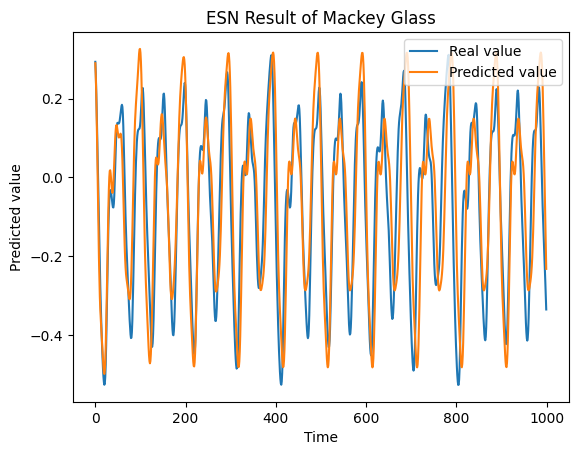

In [ ]:
from ESN_py.utils.func import metric_func

plt.plot(df[1000:2000], label="Real value")  # Plot the real values
plt.plot(generate_result.detach().cpu().numpy(), label="Predicted value")  # Plot the predicted values

# Print metrics
metric_func(df[1000:2000], generate_result.detach().cpu().numpy())

# Plot Mackey glass
plt.title("ESN Result of Mackey Glass")
plt.xlabel("Time")
plt.ylabel("Predicted value")
plt.legend(loc='upper right')
plt.show()
